# (201902-Fordgobike-Tripdata)
## by (Loai Muhammed)

## Investigation Overview

> see the relation of gender and birth year (age) with rent duration and userr type

## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.drop(['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude'],axis = 1, inplace= True)
df.dropna(inplace= True)


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

> younger users tends to subscribe more and longer rides tends to be from subscribers

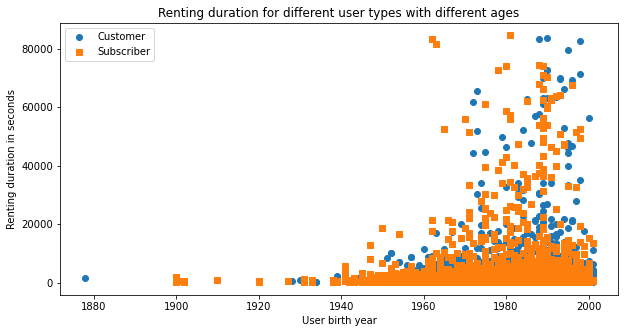

In [19]:
usert_markers = [['Customer', 'o'],
               ['Subscriber', 's']]
plt.figure(figsize = [10,5])

for usert, marker in usert_markers:
    df_usert = df[df['user_type'] == usert]
    plt.scatter(data = df_usert, x = 'member_birth_year', y = 'duration_sec', marker = marker)
plt.legend(['Customer','Subscriber'])
plt.title('Renting duration for different user types with different ages')
plt.ylabel('Renting duration in seconds')
plt.xlabel('User birth year');

## (Visualization 2)

> Renting duration per gender and user type


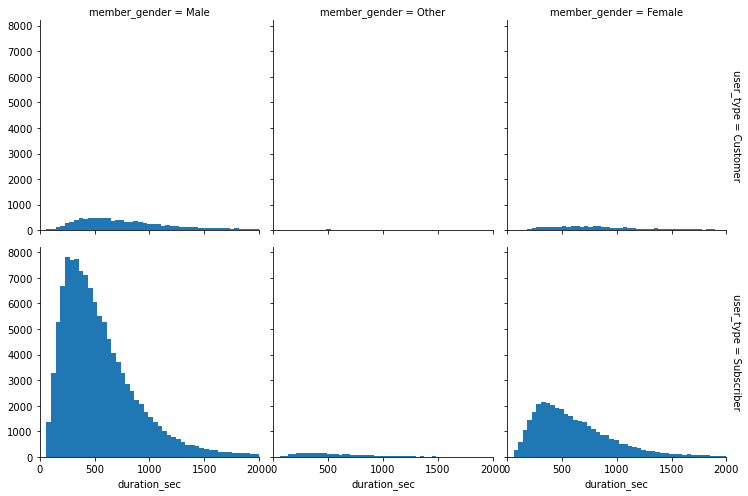

In [26]:
g = sb.FacetGrid(data = df, col = 'member_gender', row = 'user_type', height = 3.5,
                margin_titles = True)
g.map(plt.hist, 'duration_sec',bins = 2000)
plt.xlim((0,2000));

## (Visualization 3)

> number of members born each year per gender and user type

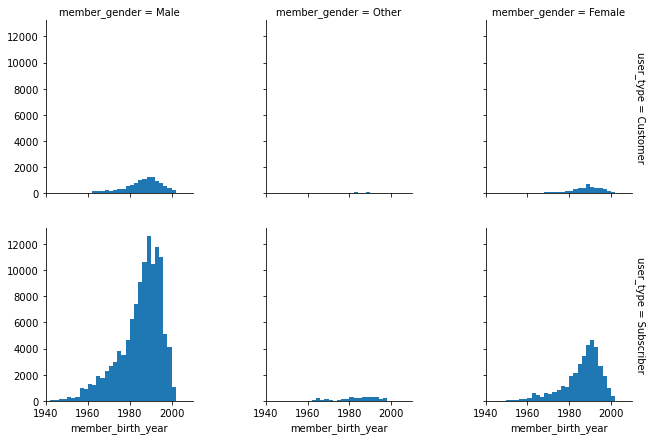

In [32]:
bins = np.arange(0, df['member_birth_year'].max()+2,2)
g = sb.FacetGrid(data = df, col = 'member_gender', row = 'user_type', height = 3.5,
                margin_titles = True, gridspec_kws={"wspace":0.5})
g.map(plt.hist, 'member_birth_year',bins = bins)
plt.xlim((1940,2010));

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!